### NLP with PYTHON


*   Understanding the problem
*   Understanding and preparing data
*   Quick wins: proof of concepts
*   Iterating and improving the results
*   Evaluation and deployment




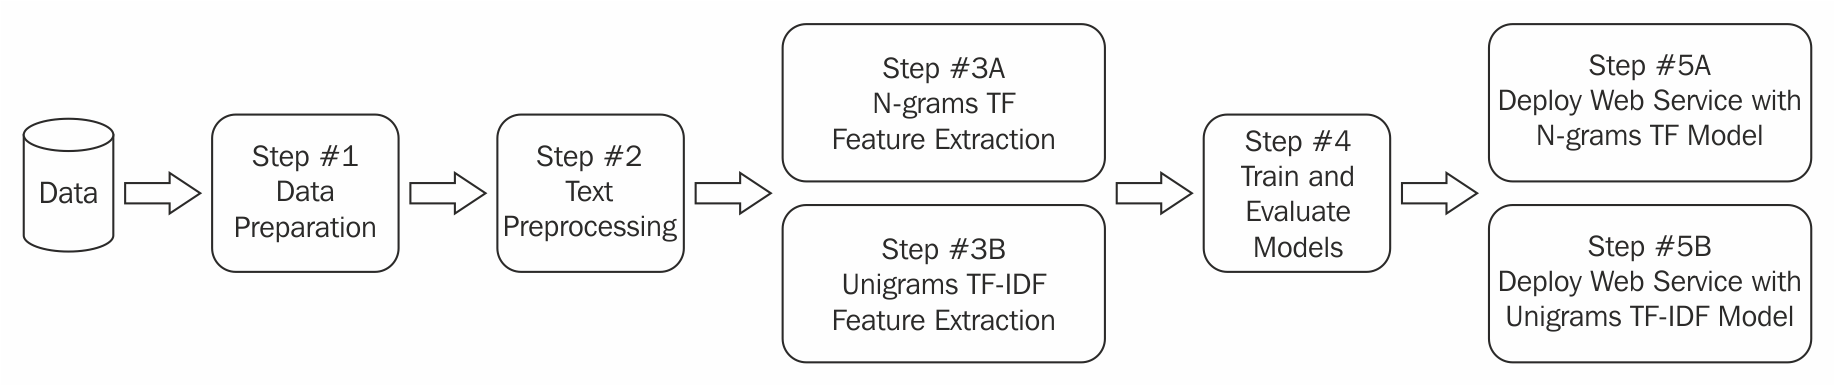

In [ ]:
# Getting the data
from sklearn.datasets import fetch_20newsgroups
tweety_train=fetch_20newsgroups(subset='train',shuffle=True,download_if_missing=True)
tweety_test=fetch_20newsgroups(subset='test',shuffle=True,download_if_missing=True)


In [ ]:
tweety_test

Count vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect=CountVectorizer()
x_train_counts=count_vect.fit_transform(tweety_train)
print(x_train_counts.shape)

(5, 5)


 [n_samples, n_features].

In [ ]:

#  TF-IDF

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

print(f'Shape of TFIDF Matrix: {X_train_tfidf.shape}')

Shape of TFIDF Matrix: (5, 5)


#### output the dimension of the Document-Term matrix,

### Machine Learning

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.pipeline import Pipeline

In [ ]:
text_lr_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),('clf',LR())])
text_lr_clf = text_lr_clf.fit(tweety_train.data, tweety_train.target)

In [ ]:
import numpy as np
lr_predicted = text_lr_clf.predict(tweety_test.data)
lr_clf_accuracy = np.mean(lr_predicted == tweety_test.target) * 100.

print(f'Test Accuracy is {lr_clf_accuracy}')

Test Accuracy is 82.74030801911843


#### Confusion Metrics

In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_true=tweety_test.target,y_pred=lr_predicted)
print(cf)

[[237   2   0   0   1   1   4   0   3   3   0   1   2   8   2  33   2   4
    1  15]
 [  1 307  14   8   8  17   6   1   0   1   0   4  10   1   4   2   1   1
    2   1]
 [  2  21 289  34  12  11   2   2   2   4   0   1   1   1   3   2   0   0
    6   1]
 [  0  13  23 284  21   2  14   3   0   1   1   1  24   0   3   0   1   0
    0   1]
 [  0   5   6  22 319   1  10   0   0   5   1   0  12   0   1   0   0   0
    3   0]
 [  0  43  38   5   4 292   3   0   0   0   0   1   3   2   4   0   0   0
    0   0]
 [  0   3   2  12   7   0 351   3   2   1   1   0   7   1   0   0   0   0
    0   0]
 [  0   1   1   4   0   2  14 352   3   2   0   0  12   1   1   0   1   0
    2   0]
 [  0   0   0   0   0   0   6  10 378   2   0   0   1   0   0   0   0   0
    1   0]
 [  1   0   0   0   2   1   6   1   0 367  15   0   2   0   0   0   1   0
    0   1]
 [  0   0   0   1   3   2   2   0   0   9 379   0   0   0   0   1   0   0
    2   0]
 [  1   8   3   0   3   4   5   2   1   5   0 349   6   0   1   0

In [ ]:
import json
print(json.dumps(cf.tolist(),indent=2))

[
  [
    237,
    2,
    0,
    0,
    1,
    1,
    4,
    0,
    3,
    3,
    0,
    1,
    2,
    8,
    2,
    33,
    2,
    4,
    1,
    15
  ],
  [
    1,
    307,
    14,
    8,
    8,
    17,
    6,
    1,
    0,
    1,
    0,
    4,
    10,
    1,
    4,
    2,
    1,
    1,
    2,
    1
  ],
  [
    2,
    21,
    289,
    34,
    12,
    11,
    2,
    2,
    2,
    4,
    0,
    1,
    1,
    1,
    3,
    2,
    0,
    0,
    6,
    1
  ],
  [
    0,
    13,
    23,
    284,
    21,
    2,
    14,
    3,
    0,
    1,
    1,
    1,
    24,
    0,
    3,
    0,
    1,
    0,
    0,
    1
  ],
  [
    0,
    5,
    6,
    22,
    319,
    1,
    10,
    0,
    0,
    5,
    1,
    0,
    12,
    0,
    1,
    0,
    0,
    0,
    3,
    0
  ],
  [
    0,
    43,
    38,
    5,
    4,
    292,
    3,
    0,
    0,
    0,
    0,
    1,
    3,
    2,
    4,
    0,
    0,
    0,
    0,
    0
  ],
  [
    0,
    3,
    2,
    12,
    7,
    0,
    351,
    3,
    2,
    1,
  

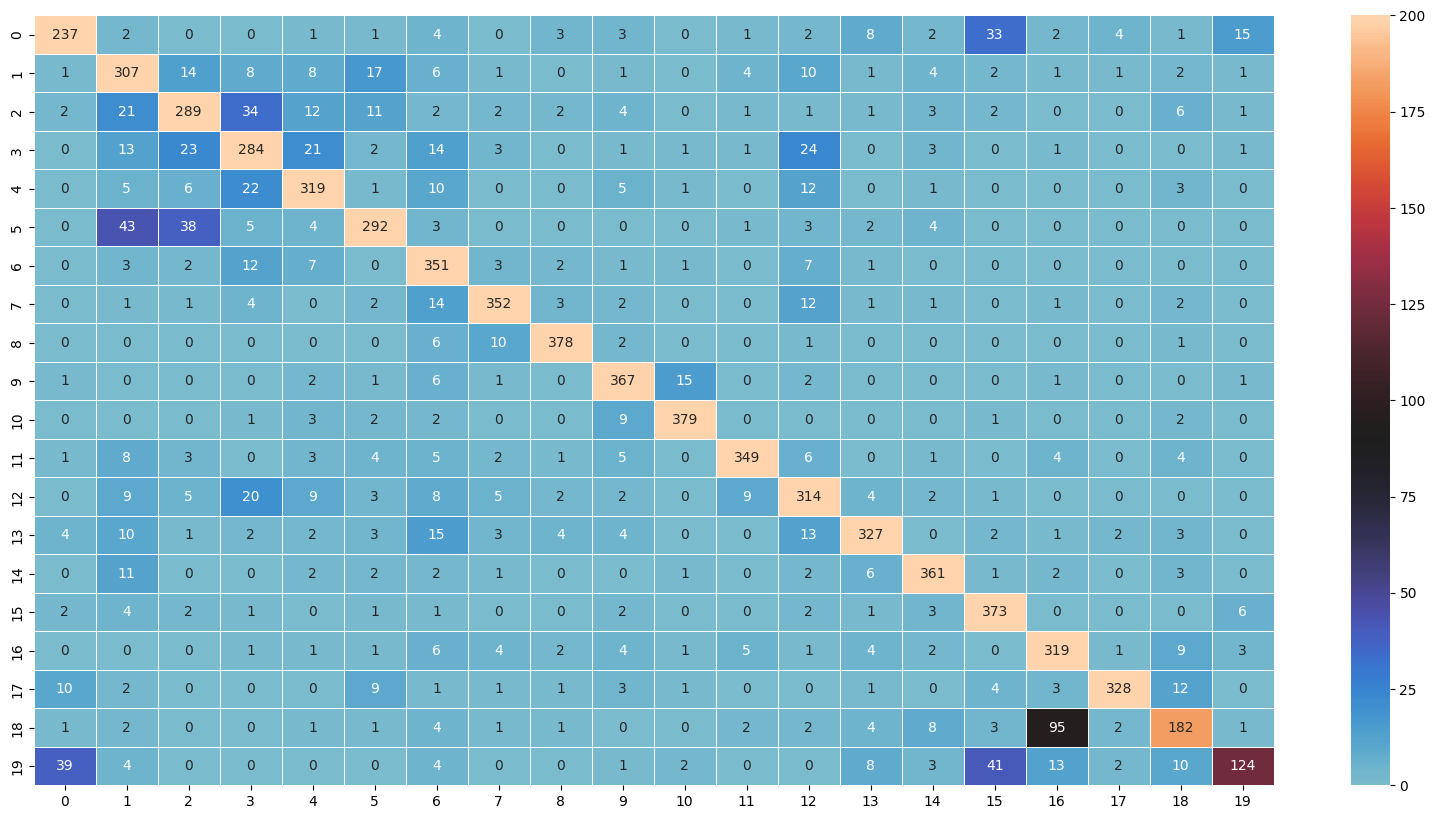

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
ax=sns.heatmap(cf,annot=True,fmt="d",linewidth=.5,center=90,vmax=200)
